In [55]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("whitegrid")

To address Philip Welkhoff's questions in May 2021 Gates Review:
- Can you separate out the cost and benefit effects of the IPTsc mode versus extended SMC? What if SPAQ was used via school delivery? How much of the difference is due to delivery mode and how much due to choice of drug?  
- How much of the cost differences are due to savings on reduced treatment and how much is delivery costs and how much is drug cost?

In [2]:
def compute_relative_cost_of_scenario(s, use_cost_low=True):
    marita_df = pd.read_csv("marita_results_2021-04-16.csv")
    
    for a, sdf in marita_df.groupby("archetype"):
        sdf = sdf.sort_values(by="Scenario")
        base = sdf[sdf["scenario_number"]==30].reset_index(drop=True)
        scen = sdf[sdf["scenario_number"]==s].reset_index(drop=True)
#         print(scen["cases"])
        if len(scen) > 0:
            print(a)
            if use_cost_low:
                scen["cost_diff"] = (base["cost.low"]-scen["cost.low"])/base["cost.low"]
            else:
                scen["cost_diff"] = (base["cost"]-scen["cost"])/base["cost"]
            scen["case_diff"] = (base["cases"]-scen["cases"])/base["cases"]
            scen["severe_diff"] = (base["cost.severe"]-scen["cost.severe"])/base["cost.severe"]

            print(scen[["cost_diff", "case_diff", "severe_diff"]])

In [22]:
def make_stacked_bar_plot(s1_dict, s2_dict, stack_order, labels):
    plt.close('all')
    plt.figure(dpi=200)
    x = labels
    bot = np.array([0.,0.])
    
    for i in range(len(stack_order)):
        c="C{}".format(i)
        y = np.array([s1_dict[stack_order[i]], s2_dict[stack_order[i]]])/5
        print(stack_order[i])
        print(y)
        plt.bar(labels, y, bottom=bot, label=stack_order[i], color=c, edgecolor=c)
        bot += y
    plt.legend()
    plt.ylim(0,np.max(bot)*1.1)
    plt.ylabel("Total cost per 1000 individuals")

In [179]:
marita_df = pd.read_csv("marita_results_2021-04-16_SMC_corrected.csv")

In [164]:
marita_df.columns

Index(['scenario_number', 'archetype', 'drug_type', 'Scenario', 'cost.CHW',
       'cost.RDT', 'cost.drug', 'cost.ACT', 'cost.smc', 'cost.facility',
       'cost.severe', 'cost.bednet', 'cost.smc.ref', 'cost.smc.low',
       'cost.low', 'cost', 'cases'],
      dtype='object')

In [165]:
marita_df = marita_df[marita_df["archetype"]=="Sahel"].reset_index(drop=True)
columns_to_keep = [
    'scenario_number',
 'archetype',
 'drug_type',
 'Scenario',
 'cost.CHW',
 'cost.RDT',
 'cost.drug',
 'cost.ACT',
 'cost.smc',
 'cost.facility',
 'cost.severe',
 'cost.bednet', 
    'cost.smc.ref',
 'cost.smc.low',
 'cost.low',
 'cost',
 'cases']
marita_df = marita_df[columns_to_keep]
marita_df = marita_df.sort_values(by=["scenario_number", "Scenario"]).reset_index(drop=True)

In [166]:
marita_df

,scenario_number,archetype,drug_type,Scenario,cost.CHW,cost.RDT,cost.drug,cost.ACT,cost.smc,cost.facility,cost.severe,cost.bednet,cost.smc.ref,cost.smc.low,cost.low,cost,cases
0,0,Sahel,SPAQ,Sahel_0_0.05,2430.516325,934.173775,999.675971,421.879947,27561.842377,23374.582676,71.635135,13869.336003,27686.655390,27561.842377,131054.871952,131054.871952,3640.902785
1,0,Sahel,SPAQ,Sahel_0_0.15,2571.296377,1363.878823,1057.083112,615.169566,28861.008765,34126.599026,175.442645,13869.336003,28711.738647,28861.008765,146918.260787,146918.260787,4417.604465
2,0,Sahel,SPAQ,Sahel_0_0.25,2574.810457,1598.794883,1058.831188,721.046027,26577.329442,40039.280161,221.333646,13869.336003,26412.213438,26577.329442,145798.720216,145798.720216,4566.878753
3,0,Sahel,SPAQ,Sahel_0_0.35,2481.598230,1959.893279,1020.635146,884.393518,26841.038939,49007.334022,296.218462,13869.336003,27029.821559,26841.038939,156116.185646,156116.185646,4798.705744
4,1,Sahel,SPAQ,Sahel_1_0.05,2079.848791,983.855380,855.507795,443.791069,27736.142611,24591.229653,125.160003,13869.336003,27686.655390,27736.142611,132560.103698,132560.103698,3838.858173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,44,Sahel,DP,Sahel_44_0.35,2124.152932,1832.773463,1346.890493,827.189779,27001.609103,45844.181076,276.143808,13869.336003,27029.821559,27001.609103,154163.585660,154163.585660,4515.714463
180,45,Sahel,DP,Sahel_45_0.05,2079.415468,761.863462,1319.683005,343.934726,27716.860759,19029.828495,93.059963,13869.336003,27686.655390,27716.860759,128087.611413,128087.611413,3205.635200
181,45,Sahel,DP,Sahel_45_0.15,2206.048424,1225.270207,1398.510563,552.820097,28892.980484,30634.711916,124.676357,13869.336003,28711.738647,28892.980484,144454.810751,144454.810751,4017.504517
182,45,Sahel,DP,Sahel_45_0.25,2220.263395,1460.267927,1407.866977,658.874867,26475.490046,36569.799945,161.529845,13869.336003,26412.213438,26475.490046,142936.970045,142936.970045,4218.606992


Scenarios of interest:
- u5 SMC (baseline).  scenario 30
- u5 SMC + IPTsc (DP).  scenario 13
- u5 SMC + IPTsc (SPAQ).  scenario 1
- u10 SMC. scenario 35
- u15 SMC.  scenario 36

Figures: 
- cost vs cases averted.
- cost breakdown.  break down intervention cost into operational overhead and dose costs.

In [215]:
cost_df = marita_df[np.in1d(marita_df["scenario_number"], [1,13,30,34,35,36])].reset_index(drop=True)
cost_df["facility_total"] = cost_df["cost.facility"] + cost_df["cost.RDT"] + cost_df["cost.ACT"] + cost_df["cost.severe"]

In [199]:
cost_smc_per_child_per_campaign = 4.171691/4
cost_smc_single_dose = 0.11

frac_smc_cost_drugs = cost_smc_single_dose/cost_smc_per_child_per_campaign
frac_smc_cost_ops = (cost_smc_per_child_per_campaign-cost_smc_single_dose)/cost_smc_per_child_per_campaign

In [200]:
frac_smc_cost_ops

0.8945271833412398

In [205]:
# Create new table/mini-dataframe of results:
hold = cost_df[cost_df["Scenario"] == "Sahel_30_0.25"]
baseline = {"scenario_number": 30,
            "scenario_name": "Baseline (u5 SMC only)",
            "facility_total": hold["facility_total"].iloc[0],
           "ipt_operations": hold["cost.CHW"].iloc[0],
           "ipt_drugs": hold["cost.drug"].iloc[0],
           "smc_operations": frac_smc_cost_ops * hold["cost.smc"].iloc[0],
           "smc_drugs": frac_smc_cost_drugs * hold["cost.smc"].iloc[0],
           "cases": hold["cases"].iloc[0]}

hold = cost_df[cost_df["Scenario"] == "Sahel_34_0.25"]
ipt_only = {"scenario_number": 34,
            "scenario_name": "IPTsc (DP) without SMC",
          "facility_total": hold["facility_total"].iloc[0],
           "ipt_operations": hold["cost.CHW"].iloc[0],
           "ipt_drugs": hold["cost.drug"].iloc[0],
           "smc_operations": 0.,
           "smc_drugs": 0.,
         "cases": hold["cases"].iloc[0]}


hold = cost_df[cost_df["Scenario"] == "Sahel_13_0.25"]
ipt_dp = {"scenario_number": 13,
            "scenario_name": "u5 SMC + IPTsc (DP)",
          "facility_total": hold["facility_total"].iloc[0],
           "ipt_operations": hold["cost.CHW"].iloc[0],
           "ipt_drugs": hold["cost.drug"].iloc[0],
#            "smc_operations": frac_smc_cost_ops * hold["cost.smc"].iloc[0],
#            "smc_drugs": frac_smc_cost_drugs * hold["cost.smc"].iloc[0],
         "cases": hold["cases"].iloc[0]}
ipt_dp["smc_operations"] = baseline["smc_operations"]
ipt_dp["smc_drugs"] = baseline["smc_drugs"]

hold = cost_df[cost_df["Scenario"] == "Sahel_1_0.25"]
ipt_spaq = {"scenario_number": 1,
            "scenario_name": "u5 SMC + IPTsc (SPAQ)",
            "facility_total": hold["facility_total"].iloc[0],
           "ipt_operations": hold["cost.CHW"].iloc[0],
           "ipt_drugs": hold["cost.drug"].iloc[0],
#            "smc_operations": frac_smc_cost_ops * hold["cost.smc"].iloc[0],
#            "smc_drugs": frac_smc_cost_drugs * hold["cost.smc"].iloc[0],
           "cases": hold["cases"].iloc[0]}
ipt_spaq["smc_operations"] = baseline["smc_operations"]
ipt_spaq["smc_drugs"] = baseline["smc_drugs"]

hold = cost_df[cost_df["Scenario"] == "Sahel_35_0.25"]
smc_u10_pessimistic = {"scenario_number": 35.1,
            "scenario_name": "u10 SMC (pessimistic)",
                       "facility_total": hold["facility_total"].iloc[0],
                       "ipt_operations": hold["cost.CHW"].iloc[0],
                       "ipt_drugs": hold["cost.drug"].iloc[0],
           "smc_operations": frac_smc_cost_ops * hold["cost.smc"].iloc[0],
           "smc_drugs": frac_smc_cost_drugs * hold["cost.smc"].iloc[0],
                      "cases": hold["cases"].iloc[0]}

smc_u10_optimistic = {"scenario_number": 35.2,
            "scenario_name": "u10 SMC (optimistic)",
    "facility_total": hold["facility_total"].iloc[0],
                       "ipt_operations": hold["cost.CHW"].iloc[0],
                       "ipt_drugs": hold["cost.drug"].iloc[0],
                       "smc_drugs": smc_u10_pessimistic["smc_drugs"],
                     "cases": hold["cases"].iloc[0]}
# smc_u10_optimistic["smc_operations"] = hold["cost.smc.low"].iloc[0]-smc_u10_optimistic["smc_drugs"]
smc_u10_optimistic["smc_operations"] = baseline["smc_operations"]


hold = cost_df[cost_df["Scenario"] == "Sahel_36_0.25"]
smc_u15_pessimistic = {"scenario_number": 36.1,
            "scenario_name": "u15 SMC (pessimistic)",
                       "facility_total": hold["facility_total"].iloc[0],
                       "ipt_operations": hold["cost.CHW"].iloc[0],
                       "ipt_drugs": hold["cost.drug"].iloc[0],
           "smc_operations": frac_smc_cost_ops * hold["cost.smc"].iloc[0],
           "smc_drugs": frac_smc_cost_drugs * hold["cost.smc"].iloc[0],
                      "cases": hold["cases"].iloc[0]}

smc_u15_optimistic = {"scenario_number": 36.2,
            "scenario_name": "u15 SMC (optimistic)",
                      "facility_total": hold["facility_total"].iloc[0],
                       "ipt_operations": hold["cost.CHW"].iloc[0],
                       "ipt_drugs": hold["cost.drug"].iloc[0],
                       "smc_drugs": smc_u15_pessimistic["smc_drugs"],
                     "cases": hold["cases"].iloc[0]}
# smc_u15_optimistic["smc_operations"] = hold["cost.smc.low"].iloc[0]-smc_u15_optimistic["smc_drugs"]
smc_u15_optimistic["smc_operations"] = baseline["smc_operations"]

summary_df = pd.DataFrame([baseline, ipt_only, ipt_dp, ipt_spaq, smc_u10_optimistic, smc_u10_pessimistic, smc_u15_optimistic, smc_u15_pessimistic])
summary_df["ipt_total"] = summary_df["ipt_operations"] + summary_df["ipt_drugs"]
summary_df["smc_total"] = summary_df["smc_operations"] + summary_df["smc_drugs"]
summary_df["cost_total"] = summary_df["ipt_total"] + summary_df["facility_total"] + summary_df["smc_total"]
# baseline["ipt_total"] = ... #do this at the end

In [208]:
ipt_only

{'scenario_number': 34,
 'scenario_name': 'IPTsc (DP) without SMC',
 'facility_total': 65172.83381848552,
 'ipt_operations': 2208.3996181285697,
 'ipt_drugs': 1400.39300995133,
 'smc_operations': 0.0,
 'smc_drugs': 0.0,
 'cases': 5993.345492551751}

In [206]:
summary_df

,scenario_number,scenario_name,facility_total,ipt_operations,ipt_drugs,smc_operations,smc_drugs,cases,ipt_total,smc_total,cost_total
0,30.0,Baseline (u5 SMC only),56958.008002,0.000000,0.000000,23626.442893,2785.770546,6300.402214,0.000000,26412.213438,83370.221441
1,34.0,IPTsc (DP) without SMC,65172.833818,2208.399618,1400.393010,0.000000,0.000000,5993.345493,3608.792628,0.000000,68781.626447
2,13.0,u5 SMC + IPTsc (DP),39679.145368,2214.315691,1404.302987,23626.442893,2785.770546,4240.334684,3618.618679,26412.213438,69709.977485
3,1.0,u5 SMC + IPTsc (SPAQ),44470.642002,2214.208500,910.675343,23626.442893,2785.770546,4822.396566,3124.883843,26412.213438,74007.739283
4,35.2,u10 SMC (optimistic),49648.026811,0.000000,0.000000,23626.442893,4430.376913,5440.227777,0.000000,28056.819806,77704.846617
5,35.1,u10 SMC (pessimistic),49648.026811,0.000000,0.000000,37574.540119,4430.376913,5440.227777,0.000000,42004.917032,91652.943843
6,36.2,u15 SMC (optimistic),43240.027708,0.000000,0.000000,23626.442893,6318.781263,4663.131110,0.000000,29945.224156,73185.251863
7,36.1,u15 SMC (pessimistic),43240.027708,0.000000,0.000000,53590.316295,6318.781263,4663.131110,0.000000,59909.097558,103149.125265


In [183]:
summary_df.to_csv("sahel_cost_summary.csv", index=False)

In [58]:
1013.007471/84839.375704

0.01194029850637195

In [57]:
2297.738641/192435.611188

0.011940298507198981

In [152]:
# Sanity check for SMC costs.
# Optimistic SMC cost means operational cost is identical to u5 case.
print(117039.599823-85283.062501)
# (2297-1020.931863)/1020.931863

31756.537322000004


facility_total
[11391.60160049  7935.82907362  8894.12840032  9929.60536221
  9929.60536221  8648.00554153  8648.00554153]
smc_operations
[16967.87514089 17056.61250028 17100.60870961 19964.54028098
 26985.02301473 23407.91996455 38487.1222376 ]
smc_drugs
[202.60149422 203.66104478 204.18637265 322.20923003 322.20923003
 459.54772821 459.54772821]
ipt_operations
[  0.         442.86313824 442.84169992   0.           0.
   0.           0.        ]
ipt_drugs
[  0.         280.86059749  66.23093405   0.           0.
   0.           0.        ]


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

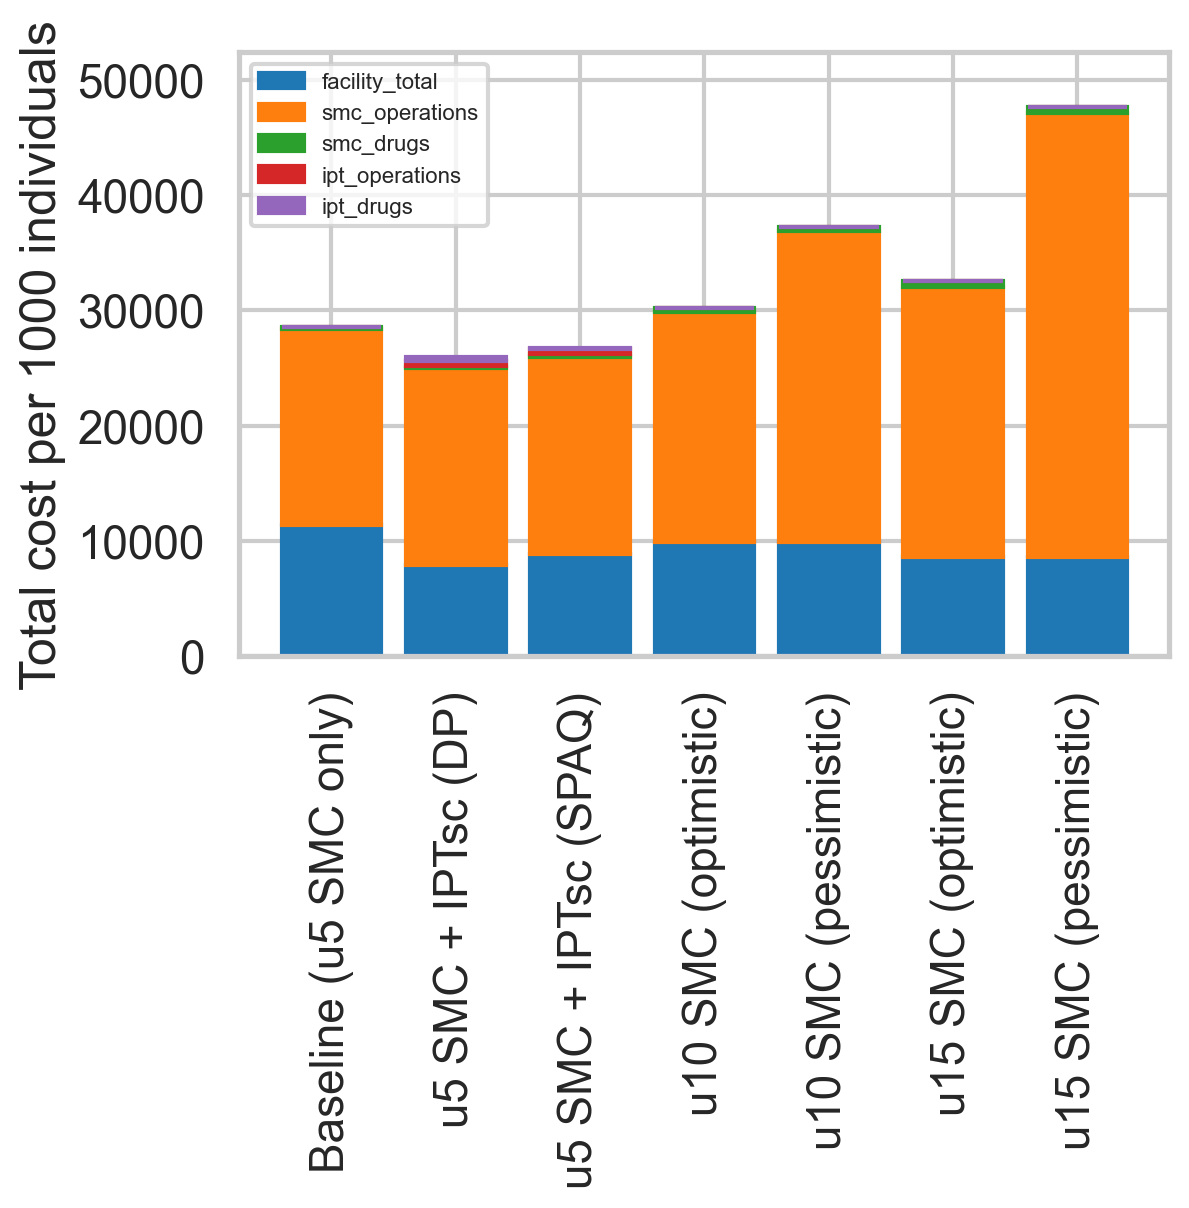

In [56]:
stack_order = ["facility_total", "smc_operations", "smc_drugs", "ipt_operations", "ipt_drugs"]

plt.close('all')
plt.figure(dpi=200)
labels = list(summary_df["scenario_name"])
bot = np.zeros(len(labels))

for i in range(len(stack_order)):
    c="C{}".format(i)
    y = np.array(summary_df[stack_order[i]])
    y /= 5 # to get per 1000 rather than per 5000
    print(stack_order[i])
    print(y)
    plt.bar(labels, y, bottom=bot, label=stack_order[i], color=c, edgecolor=c)
    bot += y
plt.legend(fontsize=8)
plt.ylim(0,np.max(bot)*1.1)
plt.ylabel("Total cost per 1000 individuals")
plt.xticks(rotation = 90)

facility_total
[11391.60160049 13034.5667637   7935.82907362  8894.12840032
  9929.60536221  9929.60536221  8648.00554153  8648.00554153]
smc_operations
[ 4725.28857854     0.          4725.28857854  4725.28857854
  4725.28857854  7514.9080238   4725.28857854 10718.06325895]
smc_drugs
[ 557.1541091     0.          557.1541091   557.1541091   886.07538257
  886.07538257 1263.75625258 1263.75625258]
ipt_operations
[  0.         441.67992363 442.86313824 442.84169992   0.
   0.           0.           0.        ]
ipt_drugs
[  0.         280.07860199 280.86059749 182.13506864   0.
   0.           0.           0.        ]


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

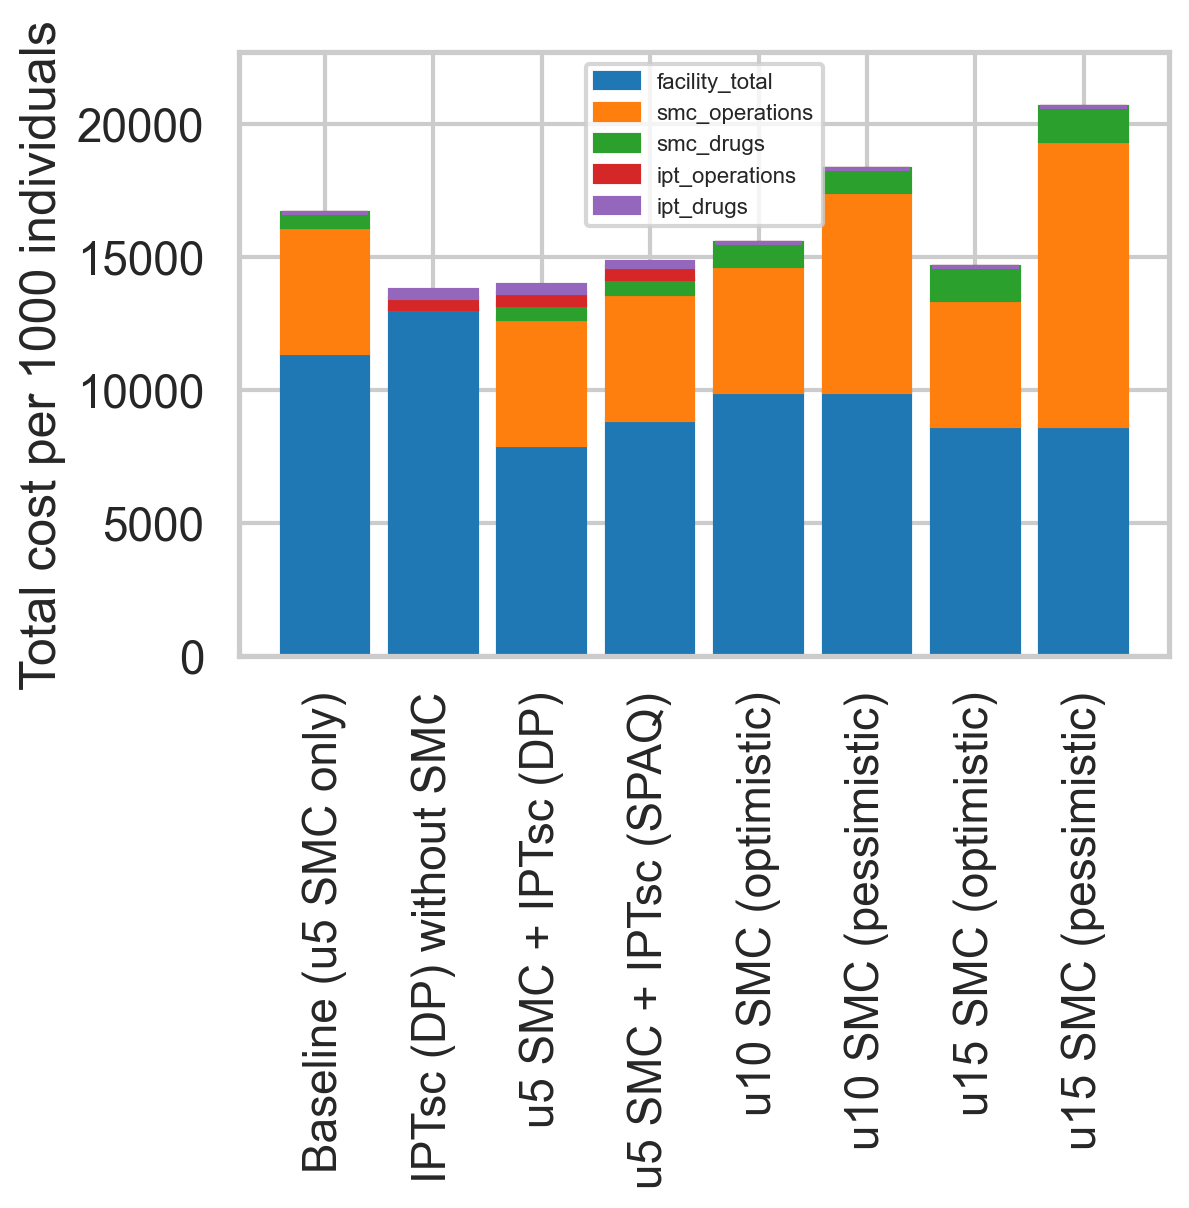

In [228]:
stack_order = ["facility_total", "smc_operations", "smc_drugs", "ipt_operations", "ipt_drugs"]

plt.close('all')
plt.figure(dpi=200)
labels = list(summary_df["scenario_name"])
bot = np.zeros(len(labels))

for i in range(len(stack_order)):
    c="C{}".format(i)
    y = np.array(summary_df[stack_order[i]])
    y /= 5 # to get per 1000 rather than per 5000
    print(stack_order[i])
    print(y)
    plt.bar(labels, y, bottom=bot, label=stack_order[i], color=c, edgecolor=c)
    bot += y
plt.legend(fontsize=8)
plt.ylim(0,np.max(bot)*1.1)
plt.ylabel("Total cost per 1000 individuals")
plt.xticks(rotation = 90)

smc_operations
[ 4725.28857854     0.          4725.28857854  4725.28857854
  4725.28857854  7514.9080238   4725.28857854 10718.06325895]
smc_drugs
[ 557.1541091     0.          557.1541091   557.1541091   886.07538257
  886.07538257 1263.75625258 1263.75625258]
facility_total
[11391.60160049 13034.5667637   7935.82907362  8894.12840032
  9929.60536221  9929.60536221  8648.00554153  8648.00554153]
ipt_operations
[  0.         441.67992363 442.86313824 442.84169992   0.
   0.           0.           0.        ]
ipt_drugs
[  0.         280.07860199 280.86059749 182.13506864   0.
   0.           0.           0.        ]


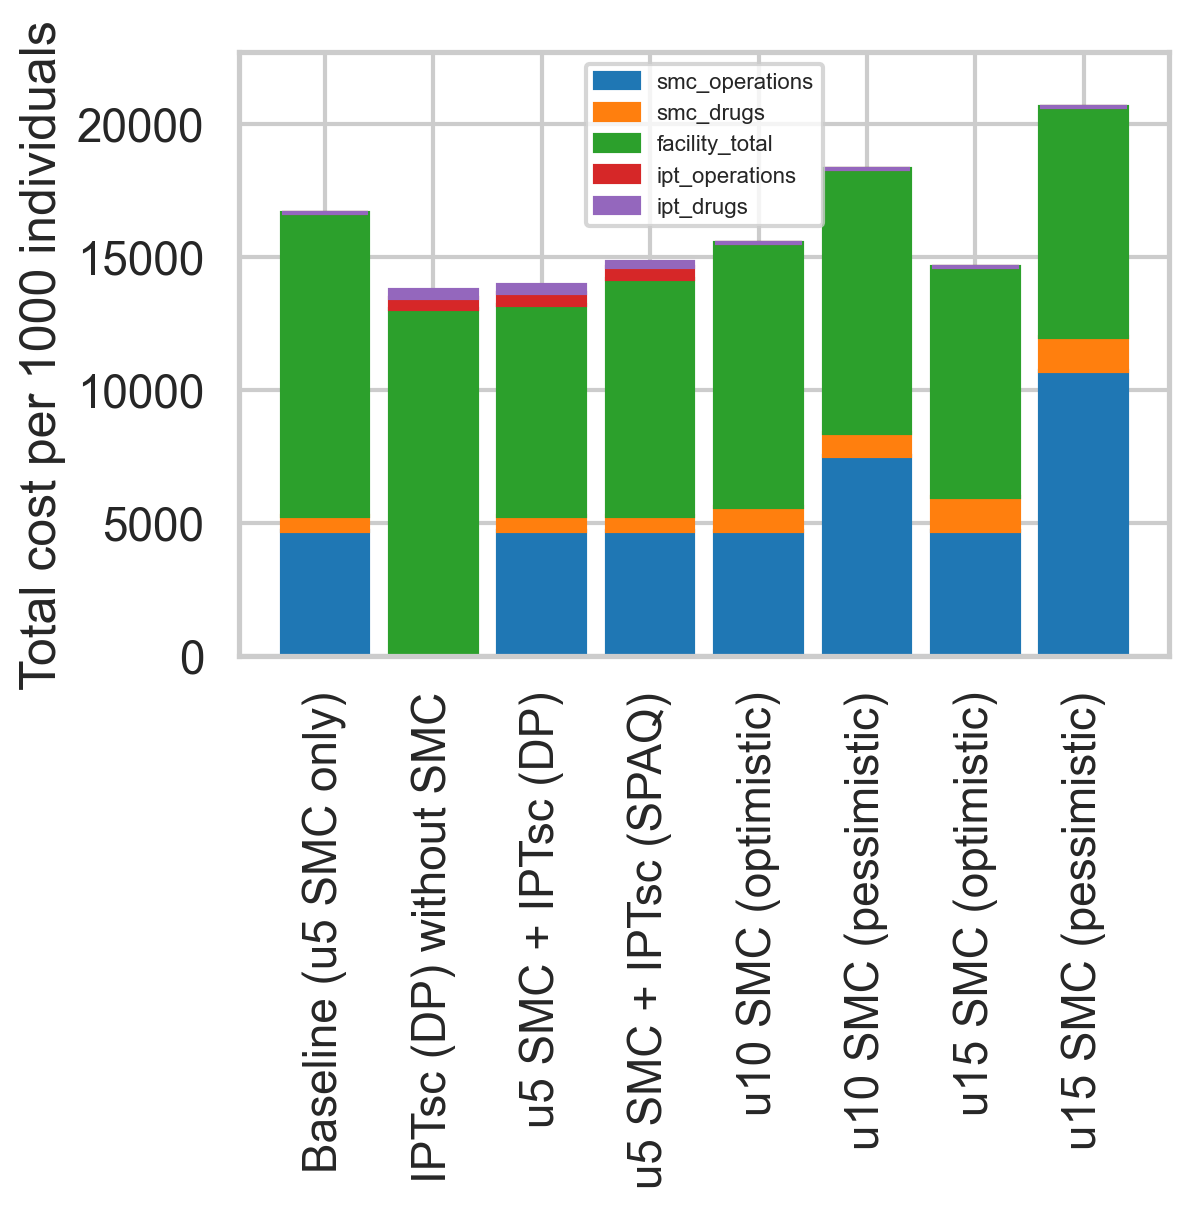

In [233]:
stack_order = ["smc_operations", "smc_drugs", "facility_total", "ipt_operations", "ipt_drugs"]

plt.close('all')
plt.figure(dpi=200)
labels = list(summary_df["scenario_name"])
bot = np.zeros(len(labels))

for i in range(len(stack_order)):
    c="C{}".format(i)
    y = np.array(summary_df[stack_order[i]])
    y /= 5 # to get per 1000 rather than per 5000
    print(stack_order[i])
    print(y)
    plt.bar(labels, y, bottom=bot, label=stack_order[i], color=c, edgecolor=c)
    bot += y
plt.legend(fontsize=8)
plt.ylim(0,np.max(bot)*1.1)
plt.ylabel("Total cost per 1000 individuals")
plt.xticks(rotation = 90)

plt.savefig("cost_breakdown_all_sahel.pdf")

In [ ]:
stack_order = ["smc_operations", "smc_drugs", "facility_total", "ipt_operations", "ipt_drugs"]

plt.close('all')
plt.figure(dpi=200)
labels = list(summary_df["scenario_name"])
bot = np.zeros(len(labels))

for i in range(len(stack_order)):
    c="C{}".format(i)
    y = np.array(summary_df[stack_order[i]])
    y /= 5 # to get per 1000 rather than per 5000
    print(stack_order[i])
    print(y)
    plt.bar(labels, y, bottom=bot, label=stack_order[i], color=c, edgecolor=c)
    bot += y
plt.legend(fontsize=8)
plt.ylim(0,np.max(bot)*1.1)
plt.ylabel("Total cost per 1000 individuals")
plt.xticks(rotation = 90)

In [68]:
summary_df

,scenario_number,scenario_name,facility_total,ipt_operations,ipt_drugs,smc_operations,smc_drugs,cases,ipt_total,smc_total,cost_total
0,30.0,Baseline (u5 SMC only),56958.008002,0.000000,0.000000,84839.375704,1013.007471,6300.402214,0.000000,85852.383176,142810.391178
1,13.0,u5 SMC + IPTsc (DP),39679.145368,2214.315691,1404.302987,84839.375704,1013.007471,4240.334684,3618.618679,85852.383176,129150.147222
2,1.0,u5 SMC + IPTsc (SPAQ),44470.642002,2214.208500,331.154670,85503.043548,1020.931863,4822.396566,2545.363170,86523.975411,133539.980583
3,35.2,u10 SMC (optimistic),49648.026811,0.000000,0.000000,84839.375704,1611.046150,5440.227777,0.000000,86450.421855,136098.448666
4,35.1,u10 SMC (pessimistic),49648.026811,0.000000,0.000000,134925.115074,1611.046150,5440.227777,0.000000,136536.161224,186184.188035
5,36.2,u15 SMC (optimistic),43240.027708,0.000000,0.000000,84839.375704,2297.738641,4663.131110,0.000000,87137.114345,130377.142053
6,36.1,u15 SMC (pessimistic),43240.027708,0.000000,0.000000,192435.611188,2297.738641,4663.131110,0.000000,194733.349829,237973.377537


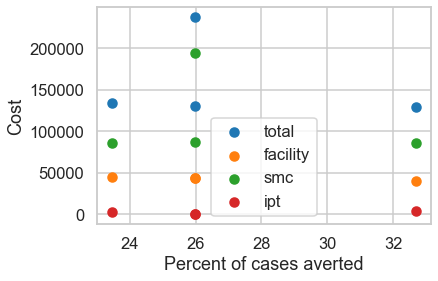

In [79]:
baseline_cases = 6300.402214
condensed = summary_df[np.in1d(summary_df["scenario_number"], [13,1,36.1,36.2])]
plt.scatter(-1*100*(condensed["cases"]-6300.402214)/6300.402214, condensed["cost_total"], label="total")
plt.scatter(-1*100*(condensed["cases"]-6300.402214)/6300.402214, condensed["facility_total"], label="facility")
plt.scatter(-1*100*(condensed["cases"]-6300.402214)/6300.402214, condensed["smc_total"], label="smc")
plt.scatter(-1*100*(condensed["cases"]-6300.402214)/6300.402214, condensed["ipt_total"], label="ipt")
plt.xlabel("Percent of cases averted")
plt.ylabel("Cost")
plt.legend()

In [230]:
for df in [baseline, ipt_dp, ipt_spaq, smc_u15_optimistic, smc_u15_pessimistic]:
    df["ipt_total"] = df["ipt_operations"] + df["ipt_drugs"]
    df["smc_total"] = df["smc_operations"] + df["smc_drugs"]
    df["cost_total"] = df["ipt_total"] + df["facility_total"] + df["smc_total"]

In [231]:
print(-1*100*(ipt_dp["cases"]-ipt_spaq["cases"])/ipt_spaq["cases"])
print(-1*100*(ipt_dp["cost_total"]-ipt_spaq["cost_total"])/ipt_spaq["cost_total"])
print(-1*100*(ipt_dp["ipt_drugs"]-ipt_spaq["ipt_drugs"])/ipt_spaq["ipt_drugs"])
print(-1*100*(ipt_dp["ipt_operations"]-ipt_spaq["ipt_operations"])/ipt_spaq["ipt_operations"])
print(-1*100*(ipt_dp["facility_total"]-ipt_spaq["facility_total"])/ipt_spaq["facility_total"])

12.069971304877976
5.807178869809917
-54.20456894419193
-0.004841079152151934
10.774516440113121


In [90]:
print(100*(ipt_dp["cases"]-ipt_spaq["cases"])/ipt_dp["cases"])
print(100*(ipt_dp["cost_total"]-ipt_spaq["cost_total"])/ipt_dp["cost_total"])
print(100*(ipt_dp["ipt_drugs"]-ipt_spaq["ipt_drugs"])/ipt_dp["ipt_drugs"])
print(100*(ipt_dp["ipt_operations"]-ipt_spaq["ipt_operations"])/ipt_dp["ipt_operations"])
print(100*(ipt_dp["facility_total"]-ipt_spaq["facility_total"])/ipt_dp["facility_total"])

-13.726791045102395
-3.3990153746564595
76.4185739679369
0.004840844803023387
-12.075604424022448


In [92]:
print(100*(ipt_dp["cases"]-smc_u15_optimistic["cases"])/ipt_dp["cases"])
print(100*(ipt_dp["cost_total"]-smc_u15_optimistic["cost_total"])/ipt_dp["cost_total"])
print(100*(ipt_dp["ipt_drugs"]-smc_u15_optimistic["ipt_drugs"])/ipt_dp["ipt_drugs"])
print(100*(ipt_dp["ipt_operations"]-smc_u15_optimistic["ipt_operations"])/ipt_dp["ipt_operations"])
print(100*(ipt_dp["facility_total"]-smc_u15_optimistic["facility_total"])/ipt_dp["facility_total"])
print("smc")
print(100*(ipt_dp["smc_drugs"]-smc_u15_optimistic["smc_drugs"])/ipt_dp["smc_drugs"])
print(100*(ipt_dp["smc_operations"]-smc_u15_optimistic["smc_operations"])/ipt_dp["smc_operations"])

-9.970826780484414
-0.9500529865935914
100.0
100.0
-8.974191118608886
smc
-126.82346444698767
0.0


In [94]:
print(100*(ipt_dp["cases"]-smc_u15_pessimistic["cases"])/ipt_dp["cases"])
print(100*(ipt_dp["cost_total"]-smc_u15_pessimistic["cost_total"])/ipt_dp["cost_total"])
print(100*(ipt_dp["ipt_drugs"]-smc_u15_pessimistic["ipt_drugs"])/ipt_dp["ipt_drugs"])
print(100*(ipt_dp["ipt_operations"]-smc_u15_pessimistic["ipt_operations"])/ipt_dp["ipt_operations"])
print(100*(ipt_dp["facility_total"]-smc_u15_pessimistic["facility_total"])/ipt_dp["facility_total"])
print("smc")
print(100*(ipt_dp["smc_drugs"]-smc_u15_pessimistic["smc_drugs"])/ipt_dp["smc_drugs"])
print(100*(ipt_dp["smc_operations"]-smc_u15_pessimistic["smc_operations"])/ipt_dp["smc_operations"])

-9.970826780484414
-84.2610191741736
100.0
100.0
-8.974191118608886
smc
-126.82346444698767
-126.82346444698769


In [98]:
print(100*(ipt_spaq["cases"]-smc_u15_optimistic["cases"])/ipt_dp["cases"])
print(100*(ipt_spaq["cost_total"]-smc_u15_optimistic["cost_total"])/ipt_dp["cost_total"])
print(100*(ipt_spaq["ipt_drugs"]-smc_u15_optimistic["ipt_drugs"])/ipt_dp["ipt_drugs"])
print(100*(ipt_spaq["ipt_operations"]-smc_u15_optimistic["ipt_operations"])/ipt_dp["ipt_operations"])
print("facility")
print(100*(ipt_spaq["facility_total"]-smc_u15_optimistic["facility_total"])/ipt_dp["facility_total"])
print("smc")
print(100*(ipt_spaq["smc_drugs"]-smc_u15_optimistic["smc_drugs"])/ipt_dp["smc_drugs"])
print(100*(ipt_spaq["smc_operations"]-smc_u15_optimistic["smc_operations"])/ipt_dp["smc_operations"])

3.7559642646179814
2.448962388062868
23.581426032063096
99.99515915519699
facility
3.101413305413561
smc
-126.041200506335
0.782263940652679


In [96]:
print(100*(ipt_spaq["cases"]-smc_u15_pessimistic["cases"])/ipt_dp["cases"])
print(100*(ipt_spaq["cost_total"]-smc_u15_pessimistic["cost_total"])/ipt_dp["cost_total"])
print(100*(ipt_spaq["ipt_drugs"]-smc_u15_pessimistic["ipt_drugs"])/ipt_dp["ipt_drugs"])
print(100*(ipt_spaq["ipt_operations"]-smc_u15_pessimistic["ipt_operations"])/ipt_dp["ipt_operations"])
print(100*(ipt_spaq["facility_total"]-smc_u15_pessimistic["facility_total"])/ipt_dp["facility_total"])
print("smc")
print(100*(ipt_spaq["smc_drugs"]-smc_u15_pessimistic["smc_drugs"])/ipt_dp["smc_drugs"])
print(100*(ipt_spaq["smc_operations"]-smc_u15_pessimistic["smc_operations"])/ipt_dp["smc_operations"])

3.7559642646179814
-80.86200379951714
23.581426032063096
99.99515915519699
3.101413305413561
smc
-126.041200506335
-126.04120050633502


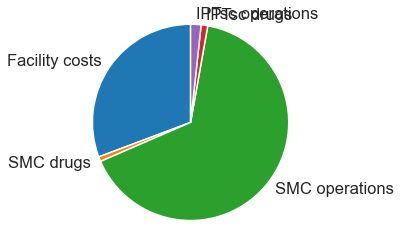

In [118]:
# Pie chart for ipt_dp:
labels = ['facility_total', 'smc_drugs', 'smc_operations',  'ipt_drugs','ipt_operations']
sizes = [ipt_dp[l] for l in labels]
new_labels = ['Facility costs', 'SMC drugs', 'SMC operations', 'IPTsc drugs', 'IPTsc operations']
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=new_labels, shadow=False, startangle=90) # autopct='%1.1f%%',
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

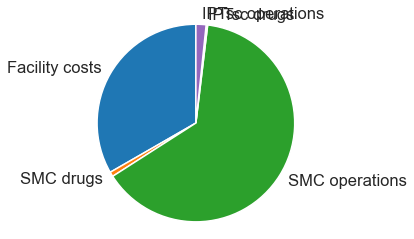

In [122]:
# Pie chart for ipt_dp:
labels = ['facility_total', 'smc_drugs', 'smc_operations',  'ipt_drugs','ipt_operations']
sizes = [ipt_spaq[l] for l in labels]
new_labels = ['Facility costs', 'SMC drugs', 'SMC operations', 'IPTsc drugs', 'IPTsc operations']
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=new_labels, shadow=False, startangle=90) # autopct='%1.1f%%',
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

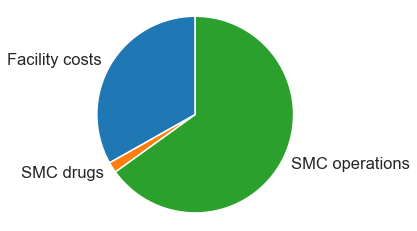

In [124]:
# Pie chart for ipt_dp:
labels = ['facility_total', 'smc_drugs', 'smc_operations']
sizes = [smc_u15_optimistic[l] for l in labels]
new_labels = ['Facility costs', 'SMC drugs', 'SMC operations']
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=new_labels, shadow=False, startangle=90) # autopct='%1.1f%%',
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

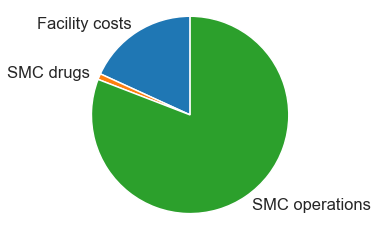

In [125]:
# Pie chart for ipt_dp:
labels = ['facility_total', 'smc_drugs', 'smc_operations']
sizes = [smc_u15_pessimistic[l] for l in labels]
new_labels = ['Facility costs', 'SMC drugs', 'SMC operations']
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=new_labels, shadow=False, startangle=90) # autopct='%1.1f%%',
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [100]:
summary_df.columns

Index(['scenario_number', 'scenario_name', 'facility_total', 'ipt_operations',
       'ipt_drugs', 'smc_operations', 'smc_drugs', 'cases', 'ipt_total',
       'smc_total', 'cost_total'],
      dtype='object')

In [ ]:
(ipt_dp["facility_total"]-ipt_spaq["facility_total"])/ipt_dp["facility_total"]

In [81]:
(ipt_dp["facility_total"]-ipt_spaq["facility_total"])/ipt_dp["facility_total"]

-0.12075604424022449

In [80]:
summary_df.columns

Index(['scenario_number', 'scenario_name', 'facility_total', 'ipt_operations',
       'ipt_drugs', 'smc_operations', 'smc_drugs', 'cases', 'ipt_total',
       'smc_total', 'cost_total'],
      dtype='object')

cost.smc
[5282.44268764 5310.06842223]
cost.facility_total
[11330.31954314  7895.98375602]
cost.severe
[61.28205736 39.8453176 ]
cost.CHW
[  0.         442.86313824]
cost.drug
[  0.         280.86059749]


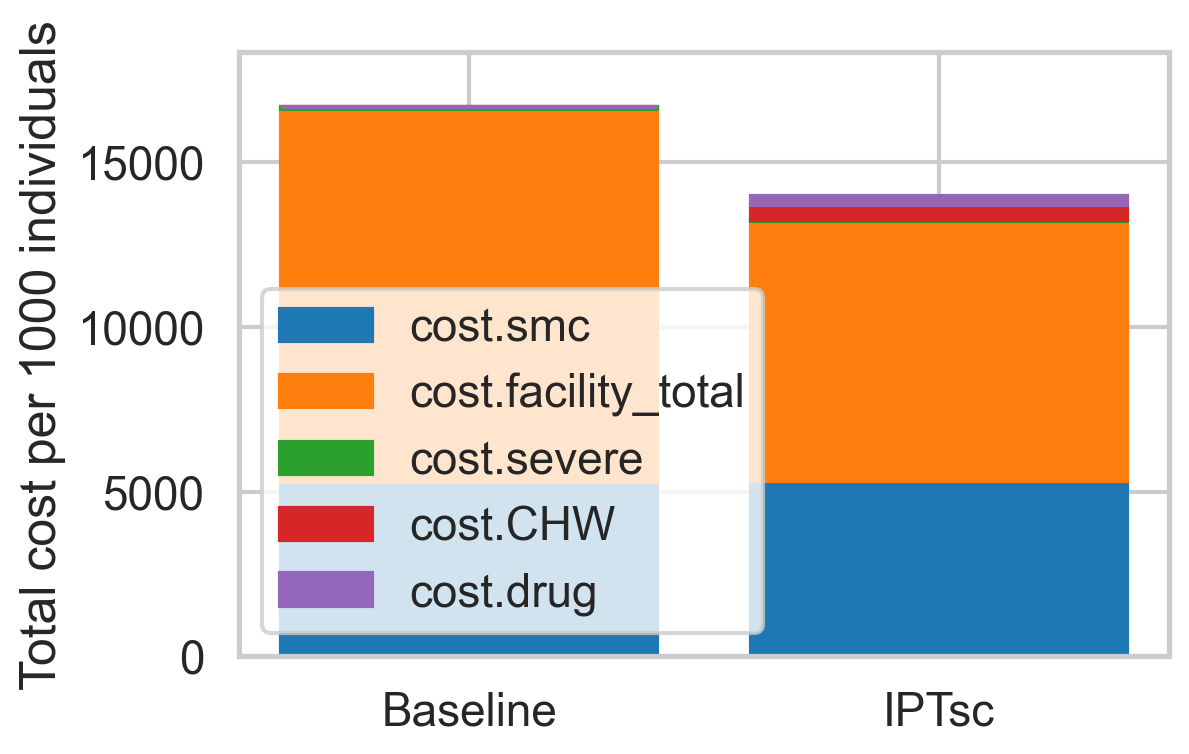

In [180]:
s1_dict = dict(marita_df[marita_df["Scenario"]=="Sahel_13_0.25"].reset_index(drop=True).iloc[0])
s2_dict = dict(marita_df[marita_df["Scenario"]=="Sahel_30_0.25"].reset_index(drop=True).iloc[0])

s1_dict["cost.facility_total"] = s1_dict["cost.facility"] + s1_dict["cost.RDT"] + s1_dict["cost.ACT"]
s2_dict["cost.facility_total"] = s2_dict["cost.facility"] + s2_dict["cost.RDT"] + s2_dict["cost.ACT"]

# stack_order = ["cost.smc","cost.facility", "cost.ACT", "cost.RDT", "cost.severe", "cost.CHW", "cost.drug"]
stack_order = ["cost.smc","cost.facility_total", "cost.severe", "cost.CHW", "cost.drug"]

make_stacked_bar_plot(s2_dict, s1_dict, stack_order, ["Baseline", "IPTsc"])
# plt.ylim([0,50000])
plt.savefig("corrected_smc_cost_bars.pdf")

# Correcting Marita's costs:

- SMC cost correction:
    - Old SMC cost was 3.39 * Received_SMC.  
    - New SMC cost is 1.04 * Received_SMC
        - 4.17 is cost per child per year of SMC.  So 4.17/4 = 1.04 is cost per child per campaign of SMC.

In [177]:
# Take marita's most recent costings and multiply SMC cost by 1.04/3.39 = 0.306
marita_df = pd.read_csv("marita_results_2021-04-16.csv")

In [157]:
columns_to_keep = [
    'scenario_number',
 'archetype',
 'drug_type',
 'Scenario',
 'cost.CHW',
 'cost.RDT',
 'cost.drug',
 'cost.ACT',
 'cost.smc',
 'cost.facility',
 'cost.severe',
 'cost.bednet', 
    'cost.smc.ref',
 'cost.smc.low',
 'cost.low',
 'cost',
 'cases']
marita_df = marita_df[columns_to_keep]
marita_df = marita_df.sort_values(by=["archetype","scenario_number", "Scenario"]).reset_index(drop=True)

In [158]:
correction_factor = (4.171691/4)/3.39
print(correction_factor)

0.30764682890855455


In [159]:
marita_df["cost.smc"] = marita_df["cost.smc"]*correction_factor
marita_df["cost.smc.ref"] = marita_df["cost.smc.ref"]*correction_factor
marita_df["cost.smc.low"] = marita_df["cost.smc.low"]*correction_factor

In [160]:
# Correct SPAQ cost from 0.04 to 0.11
marita_df.loc[marita_df["drug_type"]=="SPAQ", "cost.drug"] *= 0.11/0.04

In [162]:
marita_df.to_csv("marita_results_2021-04-16_SMC_corrected.csv", index=False)

# Updating GR figures

u5 SMC + IPTsc
28693.693554945803
u5 SMC
31335.945436136197
IPTsc only
16530.19248984906
u10 SMC
40010.704807501
u15 SMC
50368.5427078814


c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Text(0.5, 1.0, 'Sahel')

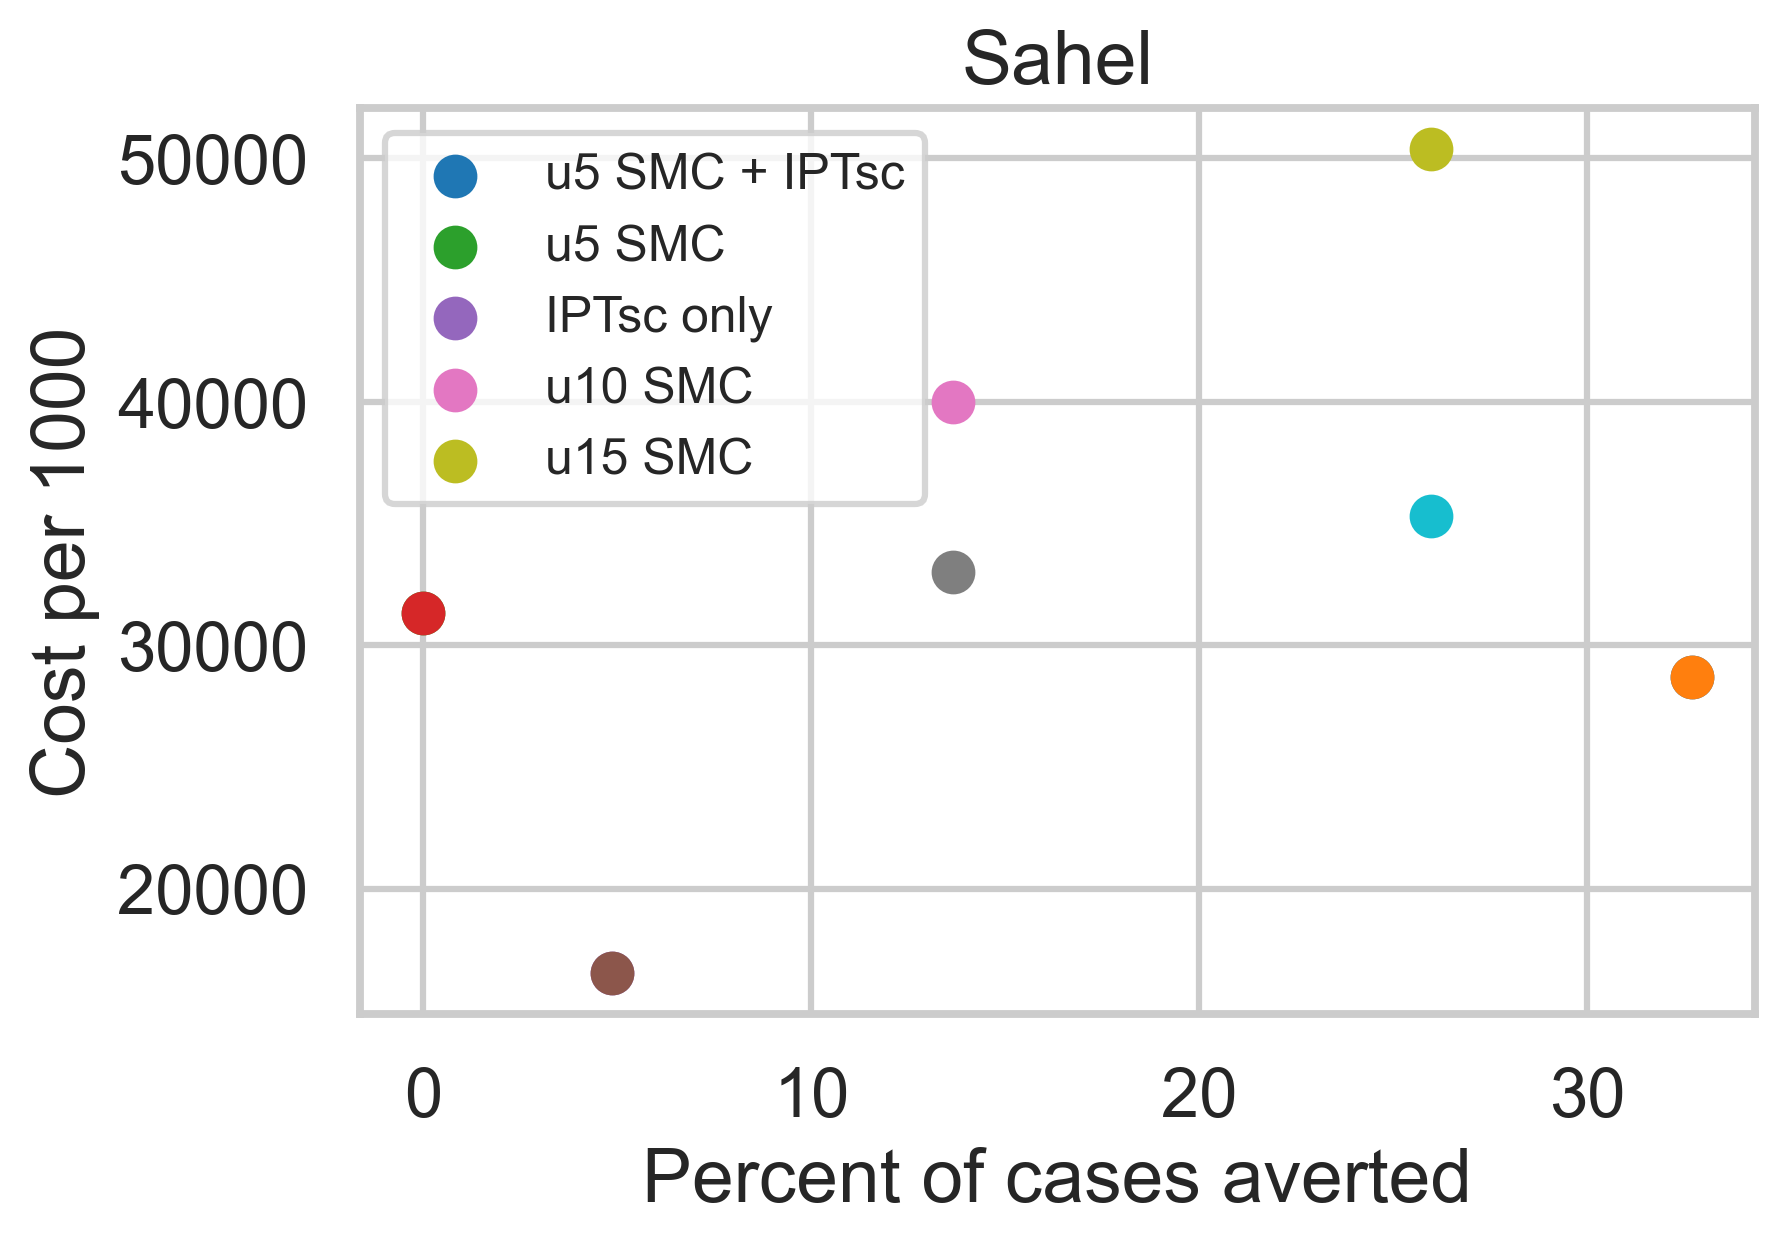

In [224]:
baseline_cases = 6300.402214 #sahel

scenario_names = {
    13: "u5 SMC + IPTsc",
    30: "u5 SMC",
    34: "IPTsc only",
    35: "u10 SMC",
    36: "u15 SMC"
}

sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Sahel",
                                       np.in1d(marita_df["scenario_number"], list(scenario_names.keys())),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]


sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    x = 100*(baseline_cases-row["cases"])/baseline_cases
    y = row["cost"]/5
    y2 = row["cost.low"]/5
    plt.scatter(x, y , label=row["scenario_name"])
    plt.scatter(x,y2)
    print(row["scenario_name"])
    print(y)
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=12)
plt.ylabel("Cost per 1000")
plt.xlabel("Percent of cases averted")
plt.title("Sahel")
# plt.savefig("figures/2021-04-13_dryrun/smc_cea.pdf")

In [189]:
ipt_

{'scenario_number': 13,
 'scenario_name': 'u5 SMC + IPTsc (DP)',
 'facility_total': 39679.14536810439,
 'ipt_operations': 2214.31569119611,
 'ipt_drugs': 1404.30298744595,
 'cases': 4240.33468395015,
 'smc_operations': 23626.442892677587,
 'smc_drugs': 2785.7705455189453,
 'ipt_total': 3618.6186786420603,
 'smc_total': 26412.213438196533,
 'cost_total': 69709.97748494298}

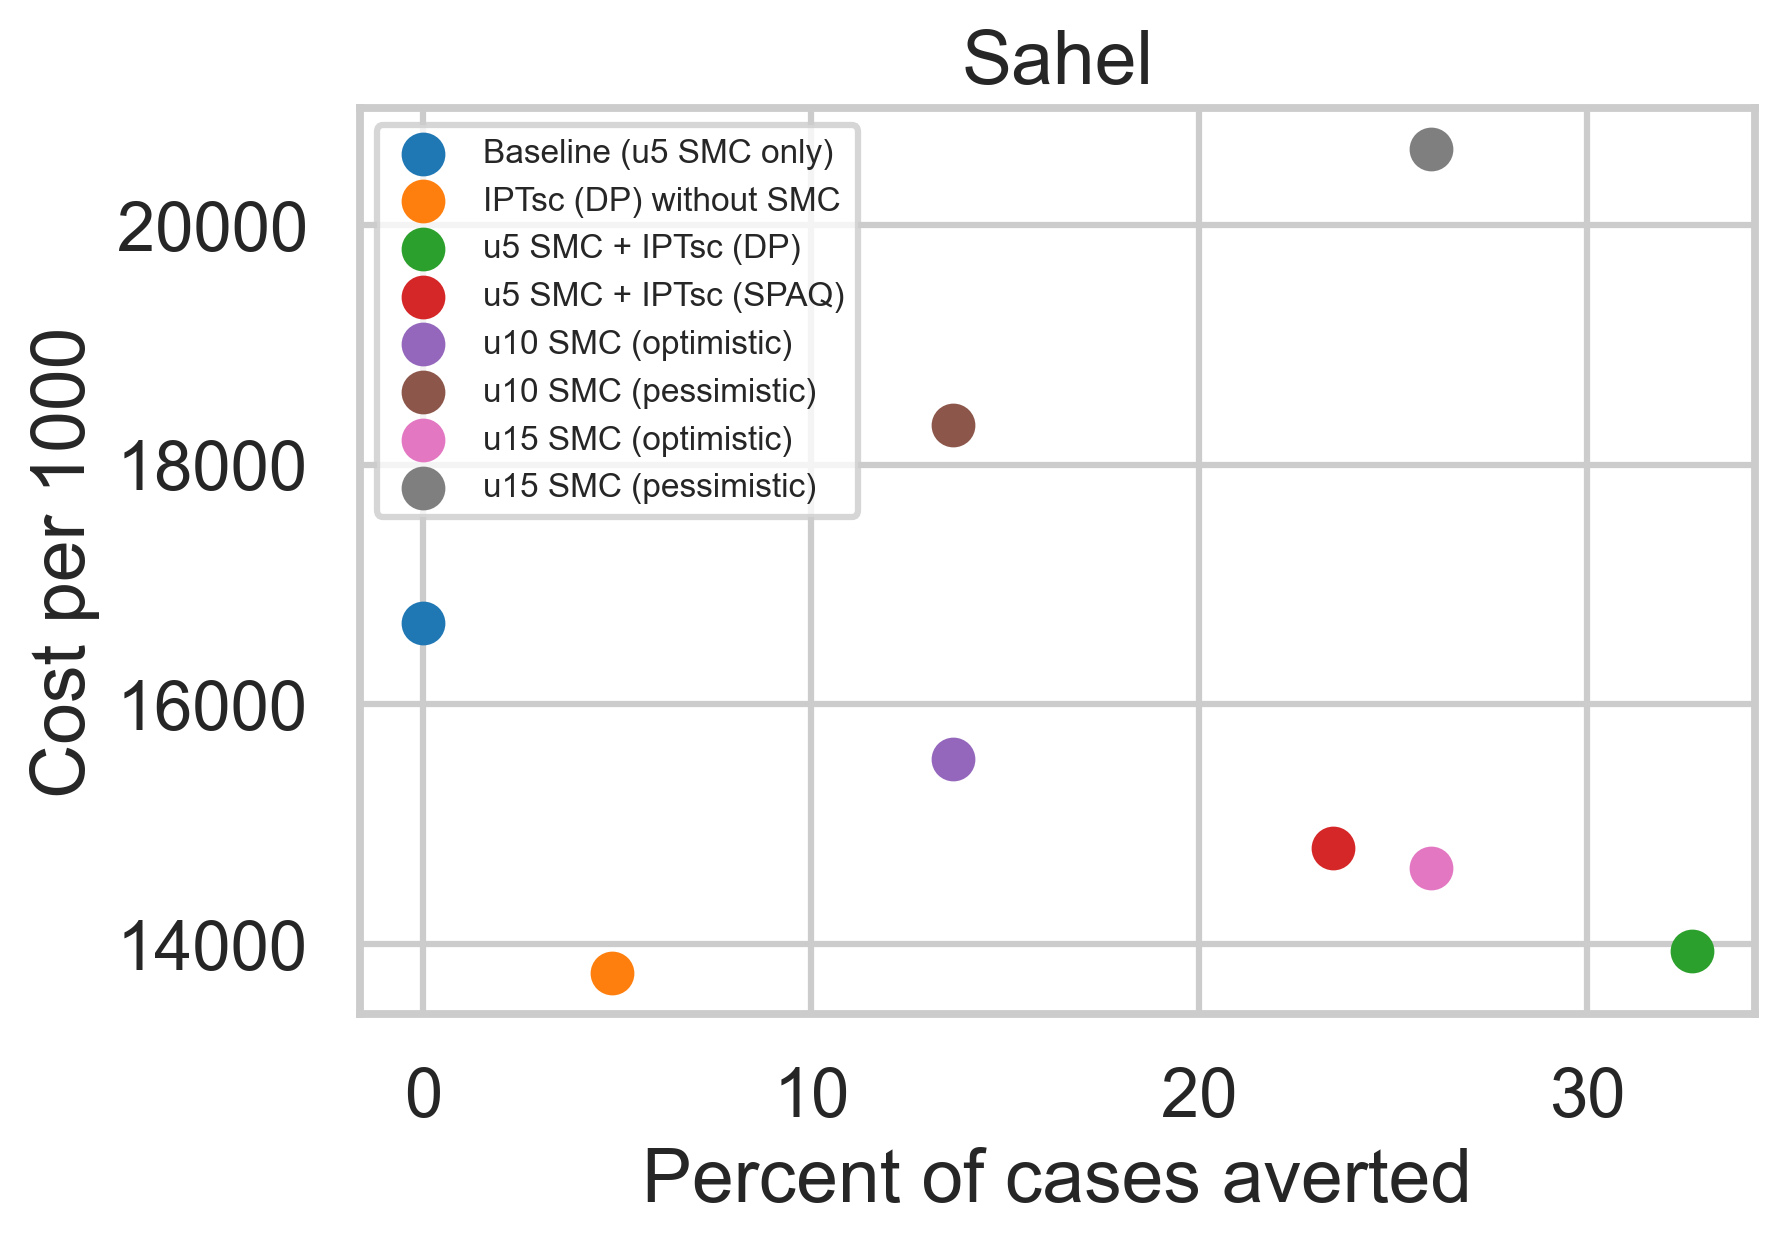

In [227]:
baseline_cases = 6300.402214 #sahel

plt.figure(dpi=300)

for i,row in summary_df.iterrows():    
    x = 100*(baseline_cases-row["cases"])/baseline_cases
    y = row["cost_total"]/5
    plt.scatter(x, y , label=row["scenario_name"])
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=8)
plt.ylabel("Cost per 1000")
plt.xlabel("Percent of cases averted")
plt.title("Sahel")
plt.savefig("smc_cea_updated.pdf")

In [197]:
marita_df[marita_df["scenario_number"]==34]

,scenario_number,archetype,drug_type,Scenario,cost.CHW,cost.RDT,cost.drug,cost.ACT,cost.smc,cost.facility,cost.severe,cost.bednet,cost.smc.ref,cost.smc.low,cost.low,cost,cases
136,34,Sahel,DP,Sahel_34_0.05,2086.455334,1188.766843,1324.112378,536.517697,0.0,29705.354360,285.630844,13869.336003,27686.655390,0.0,48996.173459,48996.173459,4254.903788
137,34,Sahel,DP,Sahel_34_0.15,2197.428164,2055.235427,1392.566516,927.109341,0.0,51385.416304,584.897433,13869.336003,28711.738647,0.0,72411.989187,72411.989187,5748.997469
138,34,Sahel,DP,Sahel_34_0.25,2208.399618,2434.745925,1400.393010,1099.232795,0.0,60899.226322,739.628777,13869.336003,26412.213438,0.0,82650.962449,82650.962449,5993.345493
139,34,Sahel,DP,Sahel_34_0.35,2136.747944,3039.698881,1355.151557,1371.725335,0.0,75969.908482,980.669965,13869.336003,27029.821559,0.0,98723.238166,98723.238166,6671.959430
320,34,Southern,DP,Southern_34_0.05,4903.535770,609.455497,1366.677711,270.319832,0.0,11271.212911,250.431556,13869.336003,0.000000,0.0,32819.788263,32819.788263,2006.647002
321,34,Southern,DP,Southern_34_0.15,4968.497615,1297.910319,1386.376485,575.722268,0.0,23909.288337,701.623584,13869.336003,0.000000,0.0,46991.173863,46991.173863,3800.874357
322,34,Southern,DP,Southern_34_0.25,4872.134331,1792.285047,1359.285155,794.645362,0.0,32969.514343,1330.596279,13869.336003,0.000000,0.0,57264.670620,57264.670620,4690.186349
323,34,Southern,DP,Southern_34_0.35,4893.869320,2259.592380,1364.601914,1002.053966,0.0,41567.209294,1640.976652,13869.336003,0.000000,0.0,66875.762654,66875.762654,5316.670030


In [209]:
ipt_only

{'scenario_number': 34,
 'scenario_name': 'IPTsc (DP) without SMC',
 'facility_total': 65172.83381848552,
 'ipt_operations': 2208.3996181285697,
 'ipt_drugs': 1400.39300995133,
 'smc_operations': 0.0,
 'smc_drugs': 0.0,
 'cases': 5993.345492551751}

In [213]:
m1 = pd.read_csv("marita_results_2021-04-16.csv")
m2 = pd.read_csv("marita_results_2021-04-16_SMC_corrected.csv")

In [212]:
m1[m1["Scenario"]=="Sahel_34_0.25"]

,Unnamed: 0,scenario_number,archetype,drug_type,Scenario,cost.CHW,cost.RDT,cost.drug,cost.ACT,cost.smc,...,cost.RDT.d,cost.drug.d,cost.facility.d,cost.severe.d,cost.d,cost.smc.ref,cost.smc.low,cost.low,cost,cases
143,144,34,Sahel,DP,Sahel_34_0.25,2208.399618,2434.745925,1400.39301,1099.232795,0.0,...,2434.745925,1400.39301,60899.226322,739.628777,82650.962449,85852.383176,0.0,82650.962449,82650.962449,5993.345493


In [214]:
m2[m2["Scenario"]=="Sahel_34_0.25"]

,scenario_number,archetype,drug_type,Scenario,cost.CHW,cost.RDT,cost.drug,cost.ACT,cost.smc,cost.facility,cost.severe,cost.bednet,cost.smc.ref,cost.smc.low,cost.low,cost,cases
138,34,Sahel,DP,Sahel_34_0.25,2208.399618,2434.745925,1400.39301,1099.232795,0.0,60899.226322,739.628777,13869.336003,26412.213438,0.0,82650.962449,82650.962449,5993.345493


In [216]:
hold = cost_df[cost_df["Scenario"] == "Sahel_34_0.25"]
ipt_only = {"scenario_number": 34,
            "scenario_name": "IPTsc (DP) without SMC",
          "facility_total": hold["facility_total"].iloc[0],
           "ipt_operations": hold["cost.CHW"].iloc[0],
           "ipt_drugs": hold["cost.drug"].iloc[0],
           "smc_operations": 0.,
           "smc_drugs": 0.,
         "cases": hold["cases"].iloc[0]}
print(ipt_only)

{'scenario_number': 34, 'scenario_name': 'IPTsc (DP) without SMC', 'facility_total': 65172.83381848552, 'ipt_operations': 2208.3996181285697, 'ipt_drugs': 1400.39300995133, 'smc_operations': 0.0, 'smc_drugs': 0.0, 'cases': 5993.345492551751}


In [220]:
(65172.83381848552+2208.3996181285697+1400.39300995133)/5

13756.325289313081

In [221]:
13869.336003/5

2773.8672006

In [222]:
82650.962449/5

16530.1924898

In [225]:
ipt_only

{'scenario_number': 34,
 'scenario_name': 'IPTsc (DP) without SMC',
 'facility_total': 65172.83381848552,
 'ipt_operations': 2208.3996181285697,
 'ipt_drugs': 1400.39300995133,
 'smc_operations': 0.0,
 'smc_drugs': 0.0,
 'cases': 5993.345492551751}

In [226]:
ipt_dp

{'scenario_number': 13,
 'scenario_name': 'u5 SMC + IPTsc (DP)',
 'facility_total': 39679.14536810439,
 'ipt_operations': 2214.31569119611,
 'ipt_drugs': 1404.30298744595,
 'cases': 4240.33468395015,
 'smc_operations': 23626.442892677587,
 'smc_drugs': 2785.7705455189453}

# Trying to summarize results

In [234]:
ipt_dp

{'scenario_number': 13,
 'scenario_name': 'u5 SMC + IPTsc (DP)',
 'facility_total': 39679.14536810439,
 'ipt_operations': 2214.31569119611,
 'ipt_drugs': 1404.30298744595,
 'cases': 4240.33468395015,
 'smc_operations': 23626.442892677587,
 'smc_drugs': 2785.7705455189453,
 'ipt_total': 3618.6186786420603,
 'smc_total': 26412.213438196533,
 'cost_total': 69709.97748494298}

In [235]:
smc_u15_optimistic

{'scenario_number': 36.2,
 'scenario_name': 'u15 SMC (optimistic)',
 'facility_total': 43240.02770766873,
 'ipt_operations': 0.0,
 'ipt_drugs': 0.0,
 'smc_drugs': 6318.78126288982,
 'cases': 4663.131110199621,
 'smc_operations': 23626.442892677587,
 'ipt_total': 0.0,
 'smc_total': 29945.224155567408,
 'cost_total': 73185.25186323613}

In [236]:
smc_u15_pessimistic

{'scenario_number': 36.1,
 'scenario_name': 'u15 SMC (pessimistic)',
 'facility_total': 43240.02770766873,
 'ipt_operations': 0.0,
 'ipt_drugs': 0.0,
 'smc_operations': 53590.3162947604,
 'smc_drugs': 6318.78126288982,
 'cases': 4663.131110199621,
 'ipt_total': 0.0,
 'smc_total': 59909.09755765022,
 'cost_total': 103149.12526531894}

In [238]:
print((69709.97748494298-73185.25186323613)/73185.25186323613)
print((69709.97748494298-103149.12526531894)/103149.12526531894)

-0.0474859932816453
-0.32418256281247354


In [256]:
print((ipt_spaq["facility_total"]-smc_u15_optimistic["facility_total"]))
print(ipt_spaq["cost_total"]-smc_u15_optimistic["cost_total"])
print((ipt_spaq["facility_total"]-smc_u15_optimistic["facility_total"])/(ipt_spaq["cost_total"]-smc_u15_optimistic["cost_total"]))
print((ipt_spaq["facility_total"]-smc_u15_pessimistic["facility_total"])/(ipt_spaq["cost_total"]-smc_u15_pessimistic["cost_total"]))

1230.6142939207784
822.487419349156
1.496210476866112
-0.042229092832095236


In [247]:
print((ipt_dp["facility_total"]-smc_u15_optimistic["facility_total"]))
print(ipt_dp["cost_total"]-smc_u15_optimistic["cost_total"])
print((ipt_dp["facility_total"]-smc_u15_optimistic["facility_total"])/(ipt_dp["cost_total"]-smc_u15_optimistic["cost_total"]))
print((ipt_dp["facility_total"]-smc_u15_pessimistic["facility_total"])/(ipt_dp["cost_total"]-smc_u15_pessimistic["cost_total"]))

-3560.882339564334
-3475.27437829315
1.0246334395367163
0.10648842975759289


In [255]:
ops_cost_diff_optimistic = smc_u15_optimistic["smc_operations"]-(ipt_dp["smc_operations"] + ipt_dp["ipt_operations"])
ops_cost_diff_pessimistic = smc_u15_pessimistic["smc_operations"]-(ipt_dp["smc_operations"] + ipt_dp["ipt_operations"])
# print((ipt_dp["facility_total"]-smc_u15_optimistic["facility_total"]))
# print(ipt_dp["cost_total"]-smc_u15_optimistic["cost_total"])
print(ops_cost_diff_optimistic/(ipt_dp["cost_total"]-smc_u15_optimistic["cost_total"]))
print(ops_cost_diff_pessimistic/(ipt_dp["cost_total"]-smc_u15_pessimistic["cost_total"]))

0.6371628395809282
-0.8298524200778753


In [254]:
ops_cost_diff_pessimistic

27749.557710886704

In [253]:
ipt_dp["cost_total"]-smc_u15_optimistic["cost_total"]

-3475.27437829315